In [1]:
import pandas as pd 
import numpy as np 
import pathlib as path
import matplotlib.pyplot as plt
import random
from PIL import Image
from random import sample

In [2]:


PATH_TO_DATA = path.Path.cwd().parent / 'data' / 'contrast' / 'pilot_same_day'  #true relational path

#this will define the name of the location to save the processed csv files (note that it will also create a "batch" directory)
batch_name='batch 1' #defines the name of the current subfolder to work on

In [3]:
PATH_TO_BATCH=PATH_TO_DATA / batch_name / 'data'
AMAZON_WORKER_fILE_PATH= PATH_TO_BATCH.parent / path.Path(batch_name.capitalize().replace(' ','_')+'_batch_results.csv')

batch_workers_df=pd.read_csv(AMAZON_WORKER_fILE_PATH)
print('number of amazon workers as reported from the amazon workers file : ',len(batch_workers_df))

#check how many participants are in the downloaded folder: 
participants_list_csvs=[file.name for file in PATH_TO_BATCH.iterdir() if '.csv' in file.name and file.stat().st_size>10000]
participants_list_names=[file.split('_')[0] for file in participants_list_csvs]
print(f'number of participant files (of sufficient size) in the downloaded results batch: {len(participants_list_csvs)}')
print(f'number of unique participant names in the batch: {len(set(participants_list_names))}')
#solve the non unique participants:
non_unique_names=np.unique([name for name in participants_list_names if participants_list_names.count(name)>1])

if len(non_unique_names)>0:
   print(f'\nhandling duplicate participants {len(non_unique_names)}:')
   #find the most recent/biggest file size from each non unique participant: 
   for participant in non_unique_names:
      all_curr_participant_csv_names=list(np.array(participants_list_csvs)[np.where(np.array(participants_list_names)==participant)])
      #get the system info on each of these duplicate files: 
      filesizes=[(PATH_TO_BATCH / file).stat().st_size for file in all_curr_participant_csv_names]
      filedates=[(PATH_TO_BATCH / file).stat().st_ctime for file in all_curr_participant_csv_names]
      largest_filesize_ind=np.argmax(filesizes) #get the index of the largest file from the duplicates
      latest_filedate_ind=np.argmax(filedates)  #get the index of the latest file from the duplicates
      if largest_filesize_ind==latest_filedate_ind: #if the same size is the most recent and largest use it as the participant file: 
         print(f'{participant} has {len(all_curr_participant_csv_names)} duplicate files  - taking the largest and latest file for this participant')
         valid_csv=all_curr_participant_csv_names[largest_filesize_ind]
         #remove it from the current subject duplicates list: 
         all_curr_participant_csv_names.remove(valid_csv)
         #remove the other duplicates fromt he participanst_list_csv: 
         for csv_to_remove in all_curr_participant_csv_names:
            participants_list_csvs.remove(csv_to_remove)
      else:
         print(f'{participant} has {len(all_curr_participant_csv_names)} duplicate files  the largest file is not the latest, so need to resolve this conflict manualy')

#get the aligned names vector after removing the duplicates: 
participants_list_names=[file.split('_')[0] for file in participants_list_csvs]
print(f'\nafter removing duplicate files, number of valid participant files = {len(participants_list_names)}\n')


#make sure the participants reported in the amazon workers corresponds to the valid csv files we got: 
print('going over the workers list as reported in amazon and finding a valid csv file for each')
valid_participants_files=[]
valid_participants_names=[]
for cur_participant in batch_workers_df['WorkerId'].values:
    if cur_participant in participants_list_names: 
      #update the batch workers file with the relevant csv name and validation columns
      batch_workers_df.loc[batch_workers_df['WorkerId']==cur_participant,'csv_path']=participants_list_csvs[participants_list_names.index(cur_participant)]
      batch_workers_df.loc[batch_workers_df['WorkerId']==cur_participant,'Approve']='x'
      #print(cur_participant)'
      valid_participants_files.append(participants_list_csvs[participants_list_names.index(cur_participant)]) 
      valid_participants_names.append(cur_participant)
    else:
      print('invalid',cur_participant)
      batch_workers_df.loc[batch_workers_df['WorkerId']==cur_participant,'Reject']='no results file was found on pavlovia servers'
    
print(f'number of valid participants to go to further processing is: {len(valid_participants_files)}')     
    

number of amazon workers as reported from the amazon workers file :  40
number of participant files (of sufficient size) in the downloaded results batch: 36
number of unique participant names in the batch: 36

after removing duplicate files, number of valid participant files = 36

going over the workers list as reported in amazon and finding a valid csv file for each
invalid AM5TNXTHWN6PZ
invalid A1UKGV9F0QODK0
invalid A35C2EW7OU8JXS
invalid AOMYFDVVIRWN2
number of valid participants to go to further processing is: 36


In [4]:
batch_workers_df[['WorkerId','Approve','Reject','Answer.surveycode','csv_path']] #will add more columns with more information on disqualfication so we can decide if we pay or not

,WorkerId,Approve,Reject,Answer.surveycode,csv_path
0,A87D3K9YVKTQ7,x,NaN,tjs,A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv
1,A3HFB277V5OXY0,x,NaN,tjs,A3HFB277V5OXY0_2022-12-12_10h12.20.926.csv
2,AM5TNXTHWN6PZ,NaN,no results file was found on pavlovia servers,tjs,NaN
3,A177M9OIBDUWFW,x,NaN,tjs,A177M9OIBDUWFW_2022-12-12_10h21.40.131.csv
4,AHZP05WVFXXCG,x,NaN,tjs,AHZP05WVFXXCG_2022-12-12_11h20.48.549.csv
5,A389RPZ5TJZQ7D,x,NaN,tjs,A389RPZ5TJZQ7D_2022-12-12_10h12.54.952.csv
6,A1UKGV9F0QODK0,NaN,no results file was found on pavlovia servers,tjs,NaN
7,AIXO7JFFSBR5O,x,NaN,tjs,AIXO7JFFSBR5O_2022-12-12_11h49.52.553.csv
8,A2TTYORXHJ7I23,x,NaN,tjs,A2TTYORXHJ7I23_2022-12-12_09h43.50.224.csv
9,A3SFP9VSFJY2YW,x,NaN,tjs,A3SFP9VSFJY2YW_2022-12-12_12h07.08.411.csv


In [5]:
def find_largest_consequtive_repetition(responses_array):
#add a stop value so the loop will use the logic also if the end of the responses is all repeating: 
    responses_array=np.append(responses_array,[99])
    longest_rep_dict=dict()
    last_input=responses_array[0]
    consequtive_rep_counter=0
    for response in responses_array[1:]: 
        if response==last_input: #if consequtive rep: 
            consequtive_rep_counter=consequtive_rep_counter+1 #add to counter
        else: #once a new entry is in the vector - store the counter rep information 
            if last_input in longest_rep_dict.keys(): #if it was allready stored in our dictionary
                if longest_rep_dict[last_input]<consequtive_rep_counter: #replace the counter only if it is higher than what stored in dict
                    longest_rep_dict[last_input]=consequtive_rep_counter
            else: #this entry is not yet in the dictionary: add it 
                longest_rep_dict[last_input]=consequtive_rep_counter
            
            consequtive_rep_counter=0
            last_input=response
    return max(longest_rep_dict.values())

In [6]:
def process_worker_results(PATH_TO_BATCH,subject_name):
    cur_sub=pd.read_csv(PATH_TO_BATCH / subject_name)
    sub_demographics=cur_sub[['workID','Age','Gender']].iloc[0]

    #extract demo related information: 

    #if participant did not click on the arrow during the demo a 'demo_encoding_response.rt' colmumn wont exists: 
    #thus we will create one and fill it with nans (so everything will be consistent with other participants)
    if not('demo_encoding_response.rt' in cur_sub.columns):
        cur_sub['demo_encoding_response.rt']=np.nan
    demo_columns=['demo_encoding_loop.thisTrialN','DemoImage','DemoCorrect','demo_encoding_response.rt','demo_encoding_response.keys']

    sub_demo_information=cur_sub[demo_columns]
    empty_inds=sub_demo_information.loc[sub_demo_information.isnull().apply(lambda x: all(x), axis=1)].index
    #drop irrelevant columns: 
    sub_demo_information=sub_demo_information.drop(index=empty_inds)


    #extract the demo test columns: 
    demo_test_columns=['demo_test_response.keys','demo_test_response.corr','demo_test_response.rt','demo_test_loop.thisTrialN','DemoImage1','DemoImage2','DemoCorrectTest']
    sub_demo_test_information=cur_sub[demo_test_columns]
    empty_inds=sub_demo_test_information.loc[sub_demo_test_information.isnull().apply(lambda x: all(x), axis=1)].index
    #drop irrelevant columns: 
    sub_demo_test_information=sub_demo_test_information.drop(index=empty_inds)

    demo_df=pd.concat([sub_demo_information.reset_index(),sub_demo_test_information.reset_index()],axis=1)

    #extract real experiment related information: 

    #if participant did not click on the arrow during the encoding a 'test_encoding_response.rt' column wont exists: 
    #thus we will create one and fill it with nans (so everything will be consistent with other participants)
    if not('test_encoding_response.rt' in cur_sub.columns):
        cur_sub['test_encoding_response.rt']=np.nan


    encoding_related_columns=['test_encoding_response.keys','test_encoding_response.corr','trials.thisTrialN','target_image','pair','layer','correct','test_encoding_response.rt','key_resp_end.keys']
    sub_encoding_information=cur_sub[encoding_related_columns]
    #encoding section ends with a key press of the space key: so seperate this phase by finding this space key row
    end_of_section_ind=np.where(sub_encoding_information['key_resp_end.keys']=='space')[0][0]
    sub_encoding_information=sub_encoding_information.iloc[0:end_of_section_ind]
    #remove all the rows that precede the real encoding phase: 
    empty_inds=sub_encoding_information.loc[sub_encoding_information.isnull().apply(lambda x: all(x), axis=1)].index
    sub_encoding_information=sub_encoding_information.drop(index=empty_inds).reset_index()

    #extract real experiment TEST related information: 
    test_related_columns=['layer','correct','test_test_response.keys','test_test_response.corr','test_test_response.rt','trials_2.thisRepN','trials_2.thisTrialN','trials_2.thisN','trials_2.thisIndex','trials_2.ran','image1','image2']
    sub_test_information=cur_sub[test_related_columns].iloc[end_of_section_ind+2:-1]


    subject_dictionary=dict()
    subject_dictionary['demographics']=sub_demographics
    subject_dictionary['demo_df']=demo_df
    subject_dictionary['encoding_df']=sub_encoding_information
    subject_dictionary['test_df']=sub_test_information

    return subject_dictionary



In [7]:
all_subjects_demo_df=pd.DataFrame()
all_subjects_encoding_df=pd.DataFrame()
all_subjects_test_df=pd.DataFrame()
all_subjects_biographics_df=pd.DataFrame()

for subject_name in valid_participants_files:
    print(subject_name)
    curr_subject_dictionary=process_worker_results(PATH_TO_BATCH,subject_name)
    curr_demo_df=curr_subject_dictionary['demo_df']
    curr_demo_df['subject']=subject_name
    curr_test_df=curr_subject_dictionary['test_df']
    curr_test_df['subject']=subject_name
    curr_encoding_df=curr_subject_dictionary['encoding_df']
    curr_encoding_df['subject']=subject_name
    curr_demographics_df=curr_subject_dictionary['demographics']
    curr_demographics_df['subject']=subject_name

    all_subjects_demo_df=pd.concat([all_subjects_demo_df,curr_demo_df],axis=0,ignore_index=True)
    all_subjects_encoding_df=pd.concat([all_subjects_encoding_df,curr_encoding_df],axis=0,ignore_index=True)
    all_subjects_test_df=pd.concat([all_subjects_test_df,curr_test_df],axis=0,ignore_index=True)
    all_subjects_biographics_df=pd.concat([all_subjects_biographics_df,pd.DataFrame(curr_demographics_df).T],axis=0,ignore_index=True)


all_subjects_demo_df.to_csv(PATH_TO_BATCH.parent / 'all_subjects_demo_df.csv')
all_subjects_encoding_df.to_csv(PATH_TO_BATCH.parent / 'all_subjects_encoding_df.csv')
all_subjects_test_df.to_csv(PATH_TO_BATCH.parent / 'all_subjects_test_df.csv')
all_subjects_biographics_df.to_csv(PATH_TO_BATCH.parent / 'all_subjects_biographics_df.csv')

A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv
A3HFB277V5OXY0_2022-12-12_10h12.20.926.csv
A177M9OIBDUWFW_2022-12-12_10h21.40.131.csv
AHZP05WVFXXCG_2022-12-12_11h20.48.549.csv
A389RPZ5TJZQ7D_2022-12-12_10h12.54.952.csv
AIXO7JFFSBR5O_2022-12-12_11h49.52.553.csv
A2TTYORXHJ7I23_2022-12-12_09h43.50.224.csv
A3SFP9VSFJY2YW_2022-12-12_12h07.08.411.csv
A28K46TA74RQH7_2022-12-12_10h21.32.130.csv
A2WJ1KQW2UBTG6_2022-12-12_10h32.46.517.csv
A2IQ0QCTQ3KWLT_2022-12-12_10h46.52.230.csv
A26M997VYVK0E6_2022-12-12_07h10.50.382.csv
AHZ7C7ETHYX3N_2022-12-12_08h11.22.910.csv
A3VH9AT1MB4MI2_2022-12-12_10h34.11.155.csv
A3N0QZ9ZKUCTCQ_2022-12-12_10h48.04.613.csv
ATO97EQDSSE7U_2022-12-12_07h40.01.775.csv
A2FFCQ9WU6R764_2022-12-12_10h15.17.138.csv
AMBZATQDG38V0_2022-12-12_11h24.20.357.csv
AWG17Q6SD22GM_2022-12-12_11h11.48.363.csv
A23R1XDY6N3XK2_2022-12-12_10h27.19.409.csv
AY3JOEWZT0APP_2022-12-12_10h12.44.548.csv
ATNY69UI91LMQ_2022-12-12_11h39.18.639.csv
A2OTMALDJLAS7_2022-12-12_11h53.11.544.csv
A1DIYFGQT1QDV2_2022-1

In [8]:
from unicodedata import category

# if there are any empty values - fill with mean of subjects age 
mean_value = all_subjects_biographics_df['Age'].mean()
all_subjects_biographics_df['Age'].fillna(value=mean_value, inplace=True)
all_subjects_biographics_df['Age'] = all_subjects_biographics_df['Age'].astype(np.int64)

all_subjects_biographics_df['Age']=all_subjects_biographics_df['Age'].astype(int)
all_subjects_biographics_df['Gender'].replace({'woman':'female','FEMLAE':'female','Male':'male','MALE':'male','FEMALE':'female','Female':'female','ale':'male'},inplace=True)
if len(set(all_subjects_biographics_df['Gender'].values))<=2:
    print('transformed the gender column to be consistent having two possible values:',np.unique(all_subjects_biographics_df['Gender'].values))
else: 
    print('gender is still inconsistent with more than 2 unique values:',set(all_subjects_biographics_df['Gender'].values))
all_subjects_biographics_df['Gender']=all_subjects_biographics_df['Gender'].astype("category")

mean_age,min_age,max_age=all_subjects_biographics_df['Age'].mean(),all_subjects_biographics_df['Age'].min(),all_subjects_biographics_df['Age'].max()
female_prop=all_subjects_biographics_df.loc[all_subjects_biographics_df['Gender']=='female','Gender'].count()/all_subjects_biographics_df['Gender'].count()

print(f'Mean age: {mean_age:.2f}, range: [{min_age} - {max_age}], {female_prop:.2f}% female')


transformed the gender column to be consistent having two possible values: ['female' 'male']
Mean age: 37.47, range: [25 - 64], 0.42% female


# this part plots the seperate dataframes: 
### demo phase (encoding and test in the same dataframe)
### encoding experiment phase
### test experiment phase

In [9]:
all_subjects_demo_df.head(5)

,index,demo_encoding_loop.thisTrialN,DemoImage,DemoCorrect,demo_encoding_response.rt,demo_encoding_response.keys,index,demo_test_response.keys,demo_test_response.corr,demo_test_response.rt,demo_test_loop.thisTrialN,DemoImage1,DemoImage2,DemoCorrectTest,subject
0,4,0.0,flower1.jpg,NaN,NaN,NaN,12.0,left,1.0,6.1939,0.0,flower1.jpg,flower1_pair.jpg,left,A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv
1,5,1.0,flower2.jpg,NaN,NaN,NaN,13.0,left,0.0,2.9508,1.0,flower2_pair.jpg,flower2.jpg,right,A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv
2,6,2.0,left.jpg,left,0.5247,left,14.0,left,1.0,2.3648,2.0,flower3.jpg,flower3_pair.jpg,left,A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv
3,7,3.0,flower3.jpg,NaN,NaN,NaN,15.0,right,0.0,1.9899,3.0,flower4.jpg,flower4_pair.jpg,left,A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv
4,8,4.0,flower4.jpg,NaN,NaN,NaN,16.0,right,1.0,1.3162,4.0,flower5_pair.jpg,flower5.jpg,right,A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv


In [245]:
all_subjects_encoding_df.head(5)

,index,test_encoding_response.keys,test_encoding_response.corr,trials.thisTrialN,target_image,pair,layer,correct,test_encoding_response.rt,key_resp_end.keys,subject
0,20,NaN,1.0,0.0,2901939379-143480.jpg,2981229442-369621.jpg,2.0,NaN,NaN,NaN,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
1,21,NaN,1.0,1.0,2964218374-144967.jpg,2883254439-140940.jpg,2.0,NaN,NaN,NaN,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
2,22,NaN,1.0,2.0,2964216465-219242.jpg,2898619327-366362.jpg,3.0,NaN,NaN,NaN,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
3,23,NaN,1.0,3.0,2452381505-199546.jpg,2238567168-34916.jpg,2.0,NaN,NaN,NaN,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
4,24,NaN,1.0,4.0,2449442529-124446.jpg,2460547536-274181.jpg,2.0,NaN,NaN,NaN,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv


In [246]:
all_subjects_test_df.head(5)

,layer,correct,test_test_response.keys,test_test_response.corr,test_test_response.rt,trials_2.thisRepN,trials_2.thisTrialN,trials_2.thisN,trials_2.thisIndex,trials_2.ran,image1,image2,subject
0,1.0,right,left,0.0,3.4835,0.0,0.0,0.0,0.0,1.0,2611628310-206388.jpg,2883256307-365057.jpg,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
1,1.0,right,left,0.0,3.9885,0.0,1.0,1.0,1.0,1.0,2964218432-369263.jpg,2898624426-291546.jpg,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
2,3.0,right,left,0.0,1.9228,0.0,2.0,2.0,2.0,1.0,2964207374-144577.jpg,2898617468-68274.jpg,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
3,1.0,right,right,1.0,1.7194,0.0,3.0,3.0,3.0,1.0,2238499057-320266.jpg,2238428357-313623.jpg,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv
4,2.0,right,right,1.0,2.1216,0.0,4.0,4.0,4.0,1.0,2984615361-295510.jpg,2883268412-365898.jpg,AOQP9IL4MK3ZQ_2022-10-19_06h59.20.459.csv


In [10]:
#this section extract information from the demo phase: it creates a df (all_subjects_summary_demo_info) containingsingle row per participants with metrics from the demo phase (average accuracy, RTs and so on (this can be used to screen participatns for further analysis)):
all_subjects_summary_demo_info=pd.DataFrame(index=list(all_subjects_demo_df['subject'].unique()))

for cur_subject in all_subjects_demo_df['subject'].unique():
    cur_sub_demo_encoding=all_subjects_demo_df.loc[all_subjects_demo_df['subject']==cur_subject]
    
    #get only attention check related info: 
    curr_subjects_summary_demo_info=cur_sub_demo_encoding[['demo_encoding_response.keys','DemoCorrect','demo_encoding_response.rt']].copy().dropna()
    if len(curr_subjects_summary_demo_info)==0: #empty - the participant didnt respond on the arrow at all: 
       all_subjects_summary_demo_info.loc[cur_subject,'arrow_correct']=0 
       all_subjects_summary_demo_info.loc[cur_subject,'arrow_rt']=np.nan
    else: 
        all_subjects_summary_demo_info.loc[cur_subject,'arrow_rt']=curr_subjects_summary_demo_info['demo_encoding_response.rt'].values
        if all(curr_subjects_summary_demo_info['DemoCorrect']==curr_subjects_summary_demo_info['demo_encoding_response.keys']):
            all_subjects_summary_demo_info.loc[cur_subject,'arrow_correct']=1
        else:
            all_subjects_summary_demo_info.loc[cur_subject,'arrow_correct']=0


    #get the correctness of the demo testing phase: 
    cur_sub_demo_test_performence=cur_sub_demo_encoding[['DemoCorrectTest','demo_test_response.keys','demo_test_response.rt']].copy().dropna()
    test_match_df=pd.DataFrame(columns=['arrow_correct'],data=cur_sub_demo_test_performence['DemoCorrectTest']==cur_sub_demo_test_performence['demo_test_response.keys'])
    test_match_df['demo_test_response.rt']=cur_sub_demo_test_performence['demo_test_response.rt']
    accuracy=test_match_df['arrow_correct'].mean()
    mean_rt=test_match_df['demo_test_response.rt'].mean()
    correct_and_incorrect_rts=test_match_df.groupby('arrow_correct').aggregate({'demo_test_response.rt':'mean'})
    #update the summary info row: 
    all_subjects_summary_demo_info.loc[cur_subject,'demo_accuracy']=accuracy
    all_subjects_summary_demo_info.loc[cur_subject,'RT_overall_mean']=mean_rt
    all_subjects_summary_demo_info.loc[cur_subject,['RT_incorrect_mean','RT_correct_mean']]=np.nan

    if False in correct_and_incorrect_rts.index:
        all_subjects_summary_demo_info.loc[cur_subject,'RT_incorrect_mean']=correct_and_incorrect_rts.loc[False].values[0]
    if True in correct_and_incorrect_rts.index:
        all_subjects_summary_demo_info.loc[cur_subject,'RT_correct_mean']=correct_and_incorrect_rts.loc[True].values[0]


#add a prefix to column names: 
all_subjects_summary_demo_info.columns=['demo_'+col for col in all_subjects_summary_demo_info.columns]
all_subjects_summary_demo_info.head(5)

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean
A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv,0.5247,1.0,0.666667,2.682083,2.47035,2.787950
A3HFB277V5OXY0_2022-12-12_10h12.20.926.csv,2.3500,1.0,0.666667,2.096550,0.51660,2.886525
A177M9OIBDUWFW_2022-12-12_10h21.40.131.csv,1.6902,1.0,1.000000,2.690300,NaN,2.690300
AHZP05WVFXXCG_2022-12-12_11h20.48.549.csv,1.6101,1.0,0.333333,15.191517,21.92145,1.731650
A389RPZ5TJZQ7D_2022-12-12_10h12.54.952.csv,2.3084,1.0,1.000000,2.737983,NaN,2.737983


In [11]:
#this part extract summary information from the experiment encoding phase: attention check accuracy and timings: 
all_subjects_summary_encoding_info=pd.DataFrame(index=list(all_subjects_encoding_df['subject'].unique()))

for cur_subject in all_subjects_encoding_df['subject'].unique():
    cur_sub_encoding=all_subjects_encoding_df.loc[all_subjects_encoding_df['subject']==cur_subject]
    
    #get only attention check related info: 
    cur_sub_encoding=cur_sub_encoding[['test_encoding_response.keys','correct','test_encoding_response.rt']].copy().dropna(how = 'all')
    if len(cur_sub_encoding)==0: #empty - the participant didnt respond on the arrow at all: 
       all_subjects_summary_encoding_info.loc[cur_subject,'arrow_accuracy']=0 
       all_subjects_summary_encoding_info.loc[cur_subject,'arrow_mean_rt']=np.nan
    else: 
        all_subjects_summary_encoding_info.loc[cur_subject,'arrow_mean_rt']=cur_sub_encoding['test_encoding_response.rt'].mean()
        arrow_accuracy=(cur_sub_encoding['correct']==cur_sub_encoding['test_encoding_response.keys']).mean()
        all_subjects_summary_encoding_info.loc[cur_subject,'arrow_accuracy']=arrow_accuracy



#add a prefix to column names: 
all_subjects_summary_encoding_info.columns=['encoding_'+col for col in all_subjects_summary_encoding_info.columns]        
all_subjects_summary_encoding_info.head(5)

,encoding_arrow_mean_rt,encoding_arrow_accuracy
A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv,0.56058,1.0
A3HFB277V5OXY0_2022-12-12_10h12.20.926.csv,1.03796,1.0
A177M9OIBDUWFW_2022-12-12_10h21.40.131.csv,1.35202,1.0
AHZP05WVFXXCG_2022-12-12_11h20.48.549.csv,1.21356,1.0
A389RPZ5TJZQ7D_2022-12-12_10h12.54.952.csv,1.73580,1.0


In [12]:
#this part extract summary information from the experiment testing phase: attention check accuracy and timings: 
all_subjects_summary_testing_info=pd.DataFrame(index=list(all_subjects_test_df['subject'].unique()))

for cur_subject in all_subjects_test_df['subject'].unique():
    cur_sub_testing=all_subjects_test_df.loc[all_subjects_test_df['subject']==cur_subject]

    #get the correctness of the testing phase: 
    cur_sub_testing_performence=cur_sub_testing[['correct','test_test_response.keys','test_test_response.rt','layer','test_test_response.corr']].copy().dropna()


    test_match_df=pd.DataFrame(columns=['correct'],data=cur_sub_testing_performence['correct']==cur_sub_testing_performence['test_test_response.keys'])
    test_match_df['test_test_response.rt']=cur_sub_testing_performence['test_test_response.rt']
    accuracy=test_match_df['correct'].mean()
    mean_rt=test_match_df['test_test_response.rt'].mean()
    correct_and_incorrect_rts_overall=test_match_df.groupby('correct').aggregate({'test_test_response.rt':'mean'})
    
    #update the summary info row: 
    all_subjects_summary_testing_info.loc[cur_subject,'Test_overall_accuracy']=accuracy
    all_subjects_summary_testing_info.loc[cur_subject,'RT_overall_mean']=mean_rt
    all_subjects_summary_testing_info.loc[cur_subject,['RT_incorrect_mean','RT_correct_mean']]=np.nan

    if False in correct_and_incorrect_rts_overall.index:
        all_subjects_summary_testing_info.loc[cur_subject,'RT_incorrect_mean']=correct_and_incorrect_rts_overall.loc[False].values[0]
    if True in correct_and_incorrect_rts_overall.index:
        all_subjects_summary_testing_info.loc[cur_subject,'RT_correct_mean']=correct_and_incorrect_rts_overall.loc[True].values[0]



    #extract layer wise information (accuracy and rt):
    correct_and_incorrect_rts=cur_sub_testing_performence.groupby('layer').aggregate({'test_test_response.rt':'mean','test_test_response.corr':'mean'})
    all_subjects_summary_testing_info.loc[cur_subject,['layer_1_rt','layer_1_accuracy','layer_2_rt','layer_2_accuracy','layer_3_rt','layer_3_accuracy']]=correct_and_incorrect_rts.values.flatten()


    #check the longest structured strike (to find bots or very unattentive participants):
    responses=cur_sub_testing_performence['test_test_response.keys'].replace({'left':1,'right':2}).values
    max_iter=find_largest_consequtive_repetition(responses)

    all_subjects_summary_testing_info.loc[cur_subject,'longest_response_strike']=max_iter

#add a prefix to column names: 
all_subjects_summary_testing_info.columns=['testing_'+col for col in all_subjects_summary_testing_info.columns]        
all_subjects_summary_testing_info.head()

,testing_Test_overall_accuracy,testing_RT_overall_mean,testing_RT_incorrect_mean,testing_RT_correct_mean,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike
A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv,0.783333,2.764928,2.986062,2.703764,3.033065,0.60,2.449925,0.95,2.811795,0.80,5.0
A3HFB277V5OXY0_2022-12-12_10h12.20.926.csv,0.466667,3.380215,3.309612,3.460904,2.973815,0.45,4.268745,0.35,2.898085,0.60,6.0
A177M9OIBDUWFW_2022-12-12_10h21.40.131.csv,0.766667,1.870012,2.031036,1.821004,1.767200,0.75,1.750150,0.85,2.092685,0.70,3.0
AHZP05WVFXXCG_2022-12-12_11h20.48.549.csv,0.800000,1.734900,1.784067,1.722608,1.626990,0.70,1.763315,0.85,1.814395,0.85,7.0
A389RPZ5TJZQ7D_2022-12-12_10h12.54.952.csv,0.816667,2.741237,2.883527,2.709294,2.432985,0.80,2.905715,0.70,2.885010,0.95,5.0


In [13]:
def find_outlier_responses(sub_test_dataframe,fast_threshold=0.1,fast_allowed_count=2,slow_threshold=10,slow_allowed_count=2):
    isfast_outlier=(sub_test_dataframe['test_test_response.rt']<fast_threshold).sum()>fast_allowed_count
    isslow_outlier=(sub_test_dataframe['test_test_response.rt']>slow_threshold).sum()>slow_allowed_count
    return isfast_outlier,isslow_outlier

In [14]:
#combine all oneliners into a single matrix - 1 line per participant with all information we want:
data_df_for_analysis=pd.concat([all_subjects_summary_demo_info,all_subjects_summary_encoding_info,all_subjects_summary_testing_info],axis=1)
data_df_for_analysis


#define thresholds: 
demo_accuracy_treshold=0.5
demo_arrow_correctness=1
encoding_arrow_accuracy=0.6
longest_allowed_consequtive_strike=15
fast_threshold=0.3
fast_allowed_count=3
slow_threshold=10
slow_allowed_count=2


#how many participants would fail the demo (did not correctly answered the arrow or had less than 60% performence)
demo_criterions_accuracy=data_df_for_analysis['demo_demo_accuracy']>=demo_accuracy_treshold
demo_criterions_attention_check=data_df_for_analysis['demo_arrow_correct']>=demo_arrow_correctness
#find which participants performed pooly on the attention checks of the experiment encoding phase: 
encoding_ciriterions=data_df_for_analysis['encoding_arrow_accuracy']>encoding_arrow_accuracy
#remove participants that are too slow: 
test_criterions_strike=data_df_for_analysis['testing_longest_response_strike']<longest_allowed_consequtive_strike

too_fast_criterions=[]
too_slow_criterions=[]
for subject in data_df_for_analysis.index:
    sub_test_dataframe=all_subjects_test_df[all_subjects_test_df['subject']==subject]
    toofast_criterion,tooslow_criterion=find_outlier_responses(sub_test_dataframe,fast_threshold=fast_threshold,fast_allowed_count=fast_allowed_count,slow_threshold=slow_threshold,slow_allowed_count=slow_allowed_count)
    too_slow_criterions.append(not tooslow_criterion)
    too_fast_criterions.append(not toofast_criterion)


print(f'summary for criterions:')
print(f'demo accuracy higher than {demo_accuracy_treshold} - qualified: {demo_criterions_accuracy.sum()}')
print(f'demo attention check correctness equals {demo_arrow_correctness} - qualified: {demo_criterions_attention_check.sum()}')
print(f'experiment encoding attention check accuracy {encoding_arrow_accuracy} - qualified: {encoding_ciriterions.sum()}')
print(f'experiment longest consequtive strike of maximum of  {longest_allowed_consequtive_strike} responses - qualified: {test_criterions_strike.sum()}')
print(f'test too fast (thresold: {fast_threshold}, allowed count: {fast_allowed_count} qualified: {sum(too_fast_criterions)}')
print(f'test too slow (thresold: {slow_threshold}, allowed count: {slow_allowed_count} qualified: {sum(too_slow_criterions)}')


#accuracy criterion on the test: 
test_accuracy_critertions=(data_df_for_analysis['testing_Test_overall_accuracy']>=0.61) | (data_df_for_analysis[['testing_layer_1_accuracy' ,'testing_layer_2_accuracy' ,'testing_layer_3_accuracy']]>=0.75).T.any()
#remove participants that were discarded based on behavior up to the test and now qualify or disqualify based on test accuracy (do they have atleast 1 significant (binomial test) accuracy in one layer, or above threshold in overall accuracy )
only_qualified=demo_criterions_accuracy & demo_criterions_attention_check & encoding_ciriterions & test_criterions_strike & too_fast_criterions & too_slow_criterions & test_accuracy_critertions

print(f'OVERALL: number of qualified participants (adhere to all criterions): {sum(only_qualified)}')



summary for criterions:
demo accuracy higher than 0.5 - qualified: 33
demo attention check correctness equals 1 - qualified: 36
experiment encoding attention check accuracy 0.6 - qualified: 28
experiment longest consequtive strike of maximum of  15 responses - qualified: 35
test too fast (thresold: 0.3, allowed count: 3 qualified: 28
test too slow (thresold: 10, allowed count: 2 qualified: 32
OVERALL: number of qualified participants (adhere to all criterions): 19


In [15]:
data_df_for_analysis

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,testing_RT_incorrect_mean,testing_RT_correct_mean,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike
A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv,0.5247,1.0,0.666667,2.682083,2.470350,2.787950,0.560580,1.0,0.783333,2.764928,2.986062,2.703764,3.033065,0.60,2.449925,0.95,2.811795,0.80,5.0
A3HFB277V5OXY0_2022-12-12_10h12.20.926.csv,2.3500,1.0,0.666667,2.096550,0.516600,2.886525,1.037960,1.0,0.466667,3.380215,3.309612,3.460904,2.973815,0.45,4.268745,0.35,2.898085,0.60,6.0
A177M9OIBDUWFW_2022-12-12_10h21.40.131.csv,1.6902,1.0,1.000000,2.690300,NaN,2.690300,1.352020,1.0,0.766667,1.870012,2.031036,1.821004,1.767200,0.75,1.750150,0.85,2.092685,0.70,3.0
AHZP05WVFXXCG_2022-12-12_11h20.48.549.csv,1.6101,1.0,0.333333,15.191517,21.921450,1.731650,1.213560,1.0,0.800000,1.734900,1.784067,1.722608,1.626990,0.70,1.763315,0.85,1.814395,0.85,7.0
A389RPZ5TJZQ7D_2022-12-12_10h12.54.952.csv,2.3084,1.0,1.000000,2.737983,NaN,2.737983,1.735800,1.0,0.816667,2.741237,2.883527,2.709294,2.432985,0.80,2.905715,0.70,2.885010,0.95,5.0
AIXO7JFFSBR5O_2022-12-12_11h49.52.553.csv,1.0377,1.0,1.000000,2.085900,NaN,2.085900,1.196800,1.0,0.833333,2.250025,2.875240,2.124982,2.072790,0.75,2.220315,0.80,2.456970,0.95,3.0
A2TTYORXHJ7I23_2022-12-12_09h43.50.224.csv,1.6761,1.0,1.000000,8.811850,NaN,8.811850,1.286760,1.0,0.983333,11.642937,30.441600,11.324315,10.379805,1.00,11.591270,0.95,12.957735,1.00,5.0
A3SFP9VSFJY2YW_2022-12-12_12h07.08.411.csv,1.2298,1.0,1.000000,2.417367,NaN,2.417367,1.166900,1.0,0.683333,2.310302,2.472958,2.234924,2.170370,0.70,2.232745,0.85,2.527790,0.50,5.0
A28K46TA74RQH7_2022-12-12_10h21.32.130.csv,0.9219,1.0,0.833333,1.816883,1.779700,1.824320,1.194800,1.0,0.600000,1.345858,1.135587,1.486039,1.376470,0.65,1.246410,0.55,1.414695,0.60,7.0
A2WJ1KQW2UBTG6_2022-12-12_10h32.46.517.csv,0.6666,1.0,0.666667,1.238050,1.868800,0.922675,0.674220,1.0,0.850000,1.274508,1.391311,1.253896,1.251745,0.75,1.182135,0.95,1.389645,0.85,7.0


In [16]:
#update the batch_workers_df  with columns representing disqualification reasons: 
tooslow_df=pd.DataFrame(data=too_slow_criterions,index=data_df_for_analysis.index,columns=['not_too_slow'])
toofast_df=pd.DataFrame(data=too_fast_criterions,index=data_df_for_analysis.index,columns=['not_too_Fast'])
test_accuracy_critertions=pd.DataFrame(data=test_accuracy_critertions,index=data_df_for_analysis.index, columns=['sufficient_test_acc'])
disqualification_df=pd.concat([demo_criterions_accuracy,demo_criterions_attention_check,encoding_ciriterions,test_criterions_strike,tooslow_df,toofast_df,test_accuracy_critertions],axis=1)
disqualification_df.head(5)


,demo_demo_accuracy,demo_arrow_correct,encoding_arrow_accuracy,testing_longest_response_strike,not_too_slow,not_too_Fast,sufficient_test_acc
A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv,True,True,True,True,True,True,True
A3HFB277V5OXY0_2022-12-12_10h12.20.926.csv,True,True,True,True,False,False,False
A177M9OIBDUWFW_2022-12-12_10h21.40.131.csv,True,True,True,True,True,True,True
AHZP05WVFXXCG_2022-12-12_11h20.48.549.csv,False,True,True,True,True,True,True
A389RPZ5TJZQ7D_2022-12-12_10h12.54.952.csv,True,True,True,True,True,True,True


In [17]:
#merge workers_df with disqualification and save: 
index_list=[ind.split('_')[0] for ind in disqualification_df.index]
disqualification_df['WorkerId']=index_list
batch_workers_df_extended = batch_workers_df.merge(disqualification_df, on="WorkerId", how = 'inner')
batch_workers_df_extended = batch_workers_df.merge(disqualification_df, on="WorkerId", how = 'outer')

#add qualification column: (currently any participant will get this qualification (even if he just openneded the experiment and quit, because we dont want him back)
qualification_colname='UPDATE-completed memory rep'
batch_workers_df_extended[qualification_colname]=1

batch_workers_df_extended.to_csv(PATH_TO_BATCH.parent/ path.Path(batch_name+'_batch_results_extended_with_disqualification.csv'))
batch_workers_df.to_csv(PATH_TO_BATCH.parent/ path.Path(batch_name+'_batch_results_for_upload.csv'))


In [18]:
#extract data that passes all criterions: 
final_participants_df=data_df_for_analysis[only_qualified]

final_participants_df

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,testing_RT_incorrect_mean,testing_RT_correct_mean,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike
A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv,0.5247,1.0,0.666667,2.682083,2.47035,2.787950,0.560580,1.0,0.783333,2.764928,2.986062,2.703764,3.033065,0.60,2.449925,0.95,2.811795,0.80,5.0
A177M9OIBDUWFW_2022-12-12_10h21.40.131.csv,1.6902,1.0,1.000000,2.690300,NaN,2.690300,1.352020,1.0,0.766667,1.870012,2.031036,1.821004,1.767200,0.75,1.750150,0.85,2.092685,0.70,3.0
A389RPZ5TJZQ7D_2022-12-12_10h12.54.952.csv,2.3084,1.0,1.000000,2.737983,NaN,2.737983,1.735800,1.0,0.816667,2.741237,2.883527,2.709294,2.432985,0.80,2.905715,0.70,2.885010,0.95,5.0
AIXO7JFFSBR5O_2022-12-12_11h49.52.553.csv,1.0377,1.0,1.000000,2.085900,NaN,2.085900,1.196800,1.0,0.833333,2.250025,2.875240,2.124982,2.072790,0.75,2.220315,0.80,2.456970,0.95,3.0
A3SFP9VSFJY2YW_2022-12-12_12h07.08.411.csv,1.2298,1.0,1.000000,2.417367,NaN,2.417367,1.166900,1.0,0.683333,2.310302,2.472958,2.234924,2.170370,0.70,2.232745,0.85,2.527790,0.50,5.0
A2WJ1KQW2UBTG6_2022-12-12_10h32.46.517.csv,0.6666,1.0,0.666667,1.238050,1.86880,0.922675,0.674220,1.0,0.850000,1.274508,1.391311,1.253896,1.251745,0.75,1.182135,0.95,1.389645,0.85,7.0
A2IQ0QCTQ3KWLT_2022-12-12_10h46.52.230.csv,0.6805,1.0,1.000000,1.465050,NaN,1.465050,0.611260,1.0,0.950000,1.398767,1.641667,1.385982,1.333985,0.90,1.316710,0.95,1.545605,1.00,5.0
AHZ7C7ETHYX3N_2022-12-12_08h11.22.910.csv,0.6646,1.0,0.666667,1.899317,2.27455,1.711700,0.569640,1.0,0.866667,1.518513,1.821175,1.471950,1.407350,0.85,1.612790,0.85,1.535400,0.90,12.0
A3VH9AT1MB4MI2_2022-12-12_10h34.11.155.csv,1.0237,1.0,0.666667,2.623200,3.39655,2.236525,1.063520,1.0,0.933333,2.184783,4.630375,2.010098,2.262620,0.90,1.917585,0.95,2.374145,0.95,4.0
A3N0QZ9ZKUCTCQ_2022-12-12_10h48.04.613.csv,0.6839,1.0,0.666667,1.948850,1.77305,2.036750,0.815600,1.0,0.900000,1.904383,3.224400,1.757715,1.855950,0.90,1.781500,0.95,2.075700,0.85,5.0


In [19]:
total_data = pd.concat([data_df_for_analysis,disqualification_df], axis = 1)
total_data.head()

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,...,testing_layer_3_accuracy,testing_longest_response_strike,demo_demo_accuracy,demo_arrow_correct,encoding_arrow_accuracy,testing_longest_response_strike,not_too_slow,not_too_Fast,sufficient_test_acc,WorkerId
A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv,0.5247,1.0,0.666667,2.682083,2.47035,2.787950,0.56058,1.0,0.783333,2.764928,...,0.80,5.0,True,True,True,True,True,True,True,A87D3K9YVKTQ7
A3HFB277V5OXY0_2022-12-12_10h12.20.926.csv,2.3500,1.0,0.666667,2.096550,0.51660,2.886525,1.03796,1.0,0.466667,3.380215,...,0.60,6.0,True,True,True,True,False,False,False,A3HFB277V5OXY0
A177M9OIBDUWFW_2022-12-12_10h21.40.131.csv,1.6902,1.0,1.000000,2.690300,NaN,2.690300,1.35202,1.0,0.766667,1.870012,...,0.70,3.0,True,True,True,True,True,True,True,A177M9OIBDUWFW
AHZP05WVFXXCG_2022-12-12_11h20.48.549.csv,1.6101,1.0,0.333333,15.191517,21.92145,1.731650,1.21356,1.0,0.800000,1.734900,...,0.85,7.0,False,True,True,True,True,True,True,AHZP05WVFXXCG
A389RPZ5TJZQ7D_2022-12-12_10h12.54.952.csv,2.3084,1.0,1.000000,2.737983,NaN,2.737983,1.73580,1.0,0.816667,2.741237,...,0.95,5.0,True,True,True,True,True,True,True,A389RPZ5TJZQ7D


In [20]:
#save the final_participants_df and the data_df_for_analysis to disk: 
final_participants_df.to_csv(PATH_TO_BATCH.parent/ 'one_line_per_participant_all_info_valid_subjects_only.csv')
total_data.to_csv(PATH_TO_BATCH.parent / 'one_line_per_participant_all_info_all_subject.csv')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


Text(523.5744949494949, 0.5, 'RT')

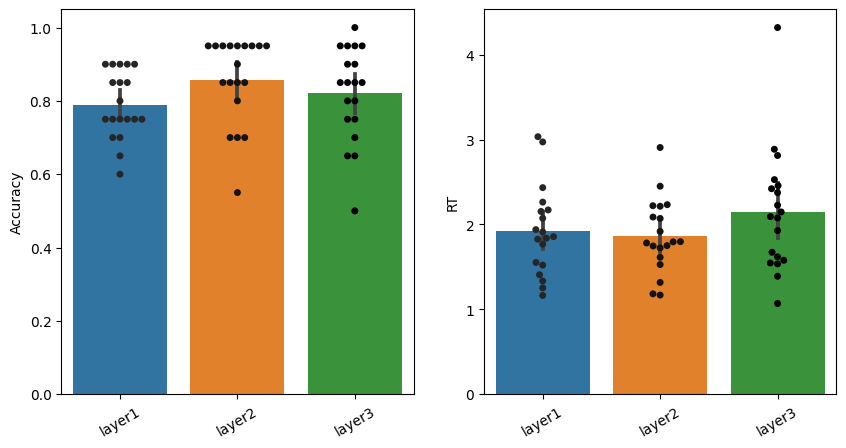

In [21]:
import seaborn as sns

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data=final_participants_df[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0])
sns.swarmplot(data=final_participants_df[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')

sns.barplot(data=final_participants_df[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1])
sns.swarmplot(data=final_participants_df[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1],color='k')

axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].set_ylabel('RT')


Text(0, 0.5, 'RT')

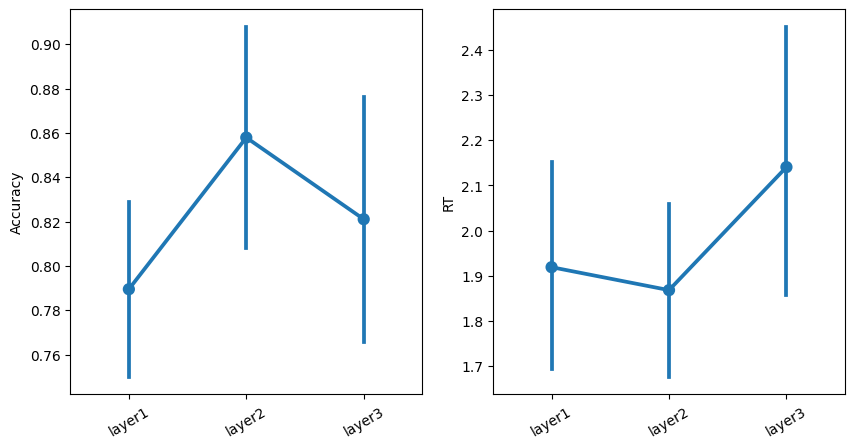

In [22]:
import seaborn as sns

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.pointplot(data=final_participants_df[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0])
#sns.swarmplot(data=final_participants_df[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')

sns.pointplot(data=final_participants_df[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1])
#sns.swarmplot(data=final_participants_df[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1],color='k')

axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].set_ylabel('RT')


In [27]:
final_participants_df

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,testing_RT_incorrect_mean,testing_RT_correct_mean,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike
A87D3K9YVKTQ7_2022-12-12_10h15.11.273.csv,0.5247,1.0,0.666667,2.682083,2.47035,2.787950,0.560580,1.0,0.783333,2.764928,2.986062,2.703764,3.033065,0.60,2.449925,0.95,2.811795,0.80,5.0
A177M9OIBDUWFW_2022-12-12_10h21.40.131.csv,1.6902,1.0,1.000000,2.690300,NaN,2.690300,1.352020,1.0,0.766667,1.870012,2.031036,1.821004,1.767200,0.75,1.750150,0.85,2.092685,0.70,3.0
A389RPZ5TJZQ7D_2022-12-12_10h12.54.952.csv,2.3084,1.0,1.000000,2.737983,NaN,2.737983,1.735800,1.0,0.816667,2.741237,2.883527,2.709294,2.432985,0.80,2.905715,0.70,2.885010,0.95,5.0
AIXO7JFFSBR5O_2022-12-12_11h49.52.553.csv,1.0377,1.0,1.000000,2.085900,NaN,2.085900,1.196800,1.0,0.833333,2.250025,2.875240,2.124982,2.072790,0.75,2.220315,0.80,2.456970,0.95,3.0
A3SFP9VSFJY2YW_2022-12-12_12h07.08.411.csv,1.2298,1.0,1.000000,2.417367,NaN,2.417367,1.166900,1.0,0.683333,2.310302,2.472958,2.234924,2.170370,0.70,2.232745,0.85,2.527790,0.50,5.0
A2WJ1KQW2UBTG6_2022-12-12_10h32.46.517.csv,0.6666,1.0,0.666667,1.238050,1.86880,0.922675,0.674220,1.0,0.850000,1.274508,1.391311,1.253896,1.251745,0.75,1.182135,0.95,1.389645,0.85,7.0
A2IQ0QCTQ3KWLT_2022-12-12_10h46.52.230.csv,0.6805,1.0,1.000000,1.465050,NaN,1.465050,0.611260,1.0,0.950000,1.398767,1.641667,1.385982,1.333985,0.90,1.316710,0.95,1.545605,1.00,5.0
AHZ7C7ETHYX3N_2022-12-12_08h11.22.910.csv,0.6646,1.0,0.666667,1.899317,2.27455,1.711700,0.569640,1.0,0.866667,1.518513,1.821175,1.471950,1.407350,0.85,1.612790,0.85,1.535400,0.90,12.0
A3VH9AT1MB4MI2_2022-12-12_10h34.11.155.csv,1.0237,1.0,0.666667,2.623200,3.39655,2.236525,1.063520,1.0,0.933333,2.184783,4.630375,2.010098,2.262620,0.90,1.917585,0.95,2.374145,0.95,4.0
A3N0QZ9ZKUCTCQ_2022-12-12_10h48.04.613.csv,0.6839,1.0,0.666667,1.948850,1.77305,2.036750,0.815600,1.0,0.900000,1.904383,3.224400,1.757715,1.855950,0.90,1.781500,0.95,2.075700,0.85,5.0


In [34]:

final_participants_df['worker_ID'] = final_participants_df.index
rt_df = pd.melt(final_participants_df,id_vars=['worker_ID'],value_vars=['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt'],var_name='layer')

accuracy_df = pd.melt(final_participants_df,id_vars=['worker_ID'],value_vars=['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy'],var_name='layer')

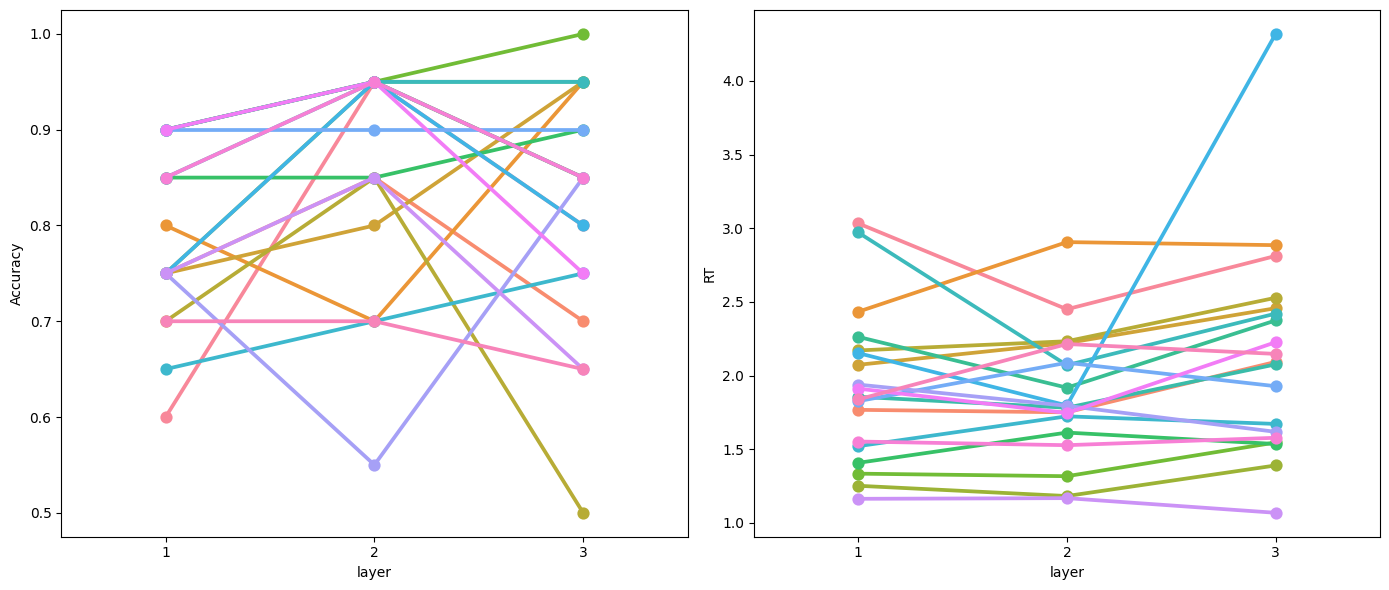

In [50]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,6),sharex=True,sharey=False)


#accuracy: 
G = sns.pointplot(data=accuracy_df,x='layer', y='value', hue='worker_ID', ax=axes[0])
plt.xticks([0,1,2],['1','2','3'])
axes[0].set_ylabel('Accuracy')
axes[0].get_legend().remove() 

#rt: 
sns.pointplot(data=rt_df,x='layer', y='value', hue='worker_ID', ax=axes[1])
plt.xticks([0,1,2],['1','2','3'])
plt.ylabel('RT')
axes[1].get_legend().remove() 
plt.tight_layout()

In [23]:
#this section loads the shelf dict in the state it is after finishing the testing session for this batch. 

import json
shelf_dict_after_test_name=PATH_TO_BATCH.parent / 'shelf after session closed.txt' #define the name of the relevant shelf for this stage
with open(shelf_dict_after_test_name) as f:
    data = f.read()
shelf_dict = json.loads(data)
shelf_dict

{'A26M997VYVK0E6': 0,
 'AHZ7C7ETHYX3N': 1,
 'A1XMC62NYIZOU7': 999,
 'A3UOG4U007DSXL': 3,
 'A3HFB277V5OXY0': 2,
 'AY3JOEWZT0APP': 4,
 'A19PO2S1CDNJMQ': 999,
 'A389RPZ5TJZQ7D': 6,
 'A2UCS2T0N5YJWK': 5,
 'A87D3K9YVKTQ7': 7,
 'A9JS7QRURE50M': 999,
 'A1WLSCW0N2KLCN': 8,
 'A2FFCQ9WU6R764': 9,
 'A28K46TA74RQH7': 10,
 'A177M9OIBDUWFW': 11,
 'A35C2EW7OU8JXS': 999,
 'A1UKGV9F0QODK0': 999,
 'AZ69TBTDH7AZS': 14,
 'AOMYFDVVIRWN2': 999,
 'A23R1XDY6N3XK2': 12,
 'AFK9ALQK5GPNG': 13,
 'A3RX5QOQ8T16NH': 999,
 'A3VH9AT1MB4MI2': 16,
 'A2B153AHPWHLH1': 15,
 'A2E0LU8V4EUX5C': 17,
 'A306SRE7WZDAZS': 999,
 'ATO97EQDSSE7U': 19,
 'A1PIOTGADK1EN1': 18,
 'A1A0HVICBQQU02': 999,
 'A2IQ0QCTQ3KWLT': 20,
 'A1DIYFGQT1QDV2': 21,
 'A2W1S3QF4K6PCP': 999,
 'A1FGCNC82QF449': 999,
 'A2NC28XJKAFJV': 999,
 'AJ8L3VXVQ0PZ5': 999,
 'A13H9NI9SOJ868': 22,
 'A2LPP288NK76W4': 999,
 'AULZR505XY3OP': 999,
 'A1V2H0UF94ATWY': 23,
 'A16K2YKULWINV2': 999,
 'AWG17Q6SD22GM': 25,
 'AM5TNXTHWN6PZ': 24,
 'A3T8AGHKKNWY9J': 26,
 'AHZP05WVFXXCG': 

In [24]:
# upload qualifications csv
workers_df = pd.read_csv(PATH_TO_BATCH.parent / 'Batch_workers.csv')
qualification_name_for_entire_experiment='UPDATE-completed memory rep'

In [25]:
#find all participants that exists in the shelf, and make sure they have a participantion code (so they wont be able to come back to this experiemnt)
all_shelf_workers_that_are_assigned_participantion=[]
for curr_key in shelf_dict.keys():
    if curr_key in workers_df['Worker ID'].values:
        workers_df.loc[workers_df['Worker ID']==curr_key,qualification_name_for_entire_experiment]=1
        all_shelf_workers_that_are_assigned_participantion.append(curr_key)

print(f'{len(all_shelf_workers_that_are_assigned_participantion)} were given a {qualification_name_for_entire_experiment}, names: {all_shelf_workers_that_are_assigned_participantion}')

#create a new shelf, that only contains the ids and numbers of valid participants (this is so we wont re-use thier custom trials order (csvs))
new_shelf_dict=dict()
for sub_id in final_participants_df.index: 
    sub_id = sub_id.split('_')[0]
    new_shelf_dict[sub_id]=shelf_dict[sub_id]
 

# append the final state of the last batch to the current batch for keeping all good participants 
previous_batch = 'batch' + str(int(batch_name[-1]) - 1)
root_dirs = list(PATH_TO_DATA.parent.iterdir())
target_dir = PATH_TO_DATA.parent / previous_batch
if target_dir in root_dirs:
    path_final_state_shelf = target_dir / 'shelf final state.txt'
    with open(path_final_state_shelf) as f:
        data = f.read()
        shelf_dict = json.loads(data)
    
    new_shelf_dict = new_shelf_dict | shelf_dict

batch_workers_df_extended.to_csv(PATH_TO_BATCH.parent / path.Path(batch_name+'_workers_results_extended_with_disqualification.csv'))
workers_df.to_csv(PATH_TO_BATCH.parent / path.Path(batch_name+'_workers_results_for_upload_after_encoding_and_test.csv'))
print('\n\ncopy the following dictionary content to the pavlovia dictionary, and to the "shelf final state.txt"\n')
json.dumps(new_shelf_dict)


40 were given a UPDATE-completed memory rep, names: ['A26M997VYVK0E6', 'AHZ7C7ETHYX3N', 'A3UOG4U007DSXL', 'A3HFB277V5OXY0', 'AY3JOEWZT0APP', 'A389RPZ5TJZQ7D', 'A2UCS2T0N5YJWK', 'A87D3K9YVKTQ7', 'A1WLSCW0N2KLCN', 'A2FFCQ9WU6R764', 'A28K46TA74RQH7', 'A177M9OIBDUWFW', 'A35C2EW7OU8JXS', 'A1UKGV9F0QODK0', 'AZ69TBTDH7AZS', 'AOMYFDVVIRWN2', 'A23R1XDY6N3XK2', 'AFK9ALQK5GPNG', 'A3VH9AT1MB4MI2', 'A2B153AHPWHLH1', 'ATO97EQDSSE7U', 'A1PIOTGADK1EN1', 'A2IQ0QCTQ3KWLT', 'A1DIYFGQT1QDV2', 'A13H9NI9SOJ868', 'AWG17Q6SD22GM', 'AM5TNXTHWN6PZ', 'A3T8AGHKKNWY9J', 'AHZP05WVFXXCG', 'A3QYT1UWB5FUM', 'AMBZATQDG38V0', 'A2WJ1KQW2UBTG6', 'ATNY69UI91LMQ', 'A3N0QZ9ZKUCTCQ', 'AIXO7JFFSBR5O', 'A2OTMALDJLAS7', 'A2I9BPKBUTYWTY', 'A3SFP9VSFJY2YW', 'AWXP5WTDRP5L8', 'A2TTYORXHJ7I23']


copy the following dictionary content to the pavlovia dictionary, and to the "shelf final state.txt"



'{"A87D3K9YVKTQ7": 7, "A177M9OIBDUWFW": 11, "A389RPZ5TJZQ7D": 6, "AIXO7JFFSBR5O": 33, "A3SFP9VSFJY2YW": 36, "A2WJ1KQW2UBTG6": 30, "A2IQ0QCTQ3KWLT": 20, "AHZ7C7ETHYX3N": 1, "A3VH9AT1MB4MI2": 16, "A3N0QZ9ZKUCTCQ": 32, "A1DIYFGQT1QDV2": 21, "A2UCS2T0N5YJWK": 5, "AZ69TBTDH7AZS": 14, "A3UOG4U007DSXL": 3, "A3QYT1UWB5FUM": 28, "A3T8AGHKKNWY9J": 26, "A2B153AHPWHLH1": 15, "AFK9ALQK5GPNG": 13, "A13H9NI9SOJ868": 22}'

In [26]:
#create a new shelf, that only contains the ids and numbers of valid participants (this is so we wont re-use thier custom trials order (csvs))
new_shelf_dict=dict()
for sub_id in final_participants_df.index: 
    sub_id = sub_id.split('_')[0]
    new_shelf_dict[sub_id]=shelf_dict[sub_id]
 

# append the final state of the last batch to the current batch for keeping all good participants 
previous_batch = 'batch' + str(int(batch_name[-1]) - 1)
root_dirs = list(PATH_TO_DATA.parent.iterdir())
target_dir = PATH_TO_DATA.parent / previous_batch
if target_dir in root_dirs:
    path_final_state_shelf = target_dir / 'shelf final state.txt'
    with open(path_final_state_shelf) as f:
        data = f.read()
        shelf_dict = json.loads(data)
    
    new_shelf_dict = new_shelf_dict | shelf_dict



print('\n\ncopy the following dictionary content to the pavlovia dictionary, and to the "shelf final state.txt"\n')
json.dumps(new_shelf_dict)



copy the following dictionary content to the pavlovia dictionary, and to the "shelf final state.txt"



'{"A87D3K9YVKTQ7": 7, "A177M9OIBDUWFW": 11, "A389RPZ5TJZQ7D": 6, "AIXO7JFFSBR5O": 33, "A3SFP9VSFJY2YW": 36, "A2WJ1KQW2UBTG6": 30, "A2IQ0QCTQ3KWLT": 20, "AHZ7C7ETHYX3N": 1, "A3VH9AT1MB4MI2": 16, "A3N0QZ9ZKUCTCQ": 32, "A1DIYFGQT1QDV2": 21, "A2UCS2T0N5YJWK": 5, "AZ69TBTDH7AZS": 14, "A3UOG4U007DSXL": 3, "A3QYT1UWB5FUM": 28, "A3T8AGHKKNWY9J": 26, "A2B153AHPWHLH1": 15, "AFK9ALQK5GPNG": 13, "A13H9NI9SOJ868": 22}'